# 2016 Food Insecurity Correlations in JN

In [2]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\NBrad\anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ------------------------------------------------------------
                                           Total:          10 KB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0




missingno-0.4.1      | 10 KB     |            |   0% 
missingno-0.4.1      | 10 KB     | ########## | 100% 
missingno-0.4.1      | 10 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda update Jupyter

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\NBrad\anaconda3

  added / updated specs:
    - jupyter


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py38haa95532_0        14.5 MB
    ------------------------------------------------------------
                                           Total:        14.5 MB

The following packages will be REMOVED:

  xmltodict-0.12.0-py_0

The following packages will be UPDATED:

  conda                               4.11.0-py38haa95532_0 --> 4.12.0-py38haa95532_0




conda-4.12.0         | 14.5 MB   |            |   0% 
conda-4.12.0         | 14.5 MB   |            |   0% 
conda-4.12.0         | 14.5 MB   | #9         |  19% 
conda-4.12.0         | 14.5 MB   | #####2     |  52% 
conda-4.12.0         | 14.5 MB   | #########1 |  92% 
conda-4.12.0         | 14.5 MB   | ######

In [3]:
import pandas as pd
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from numpy import nan

# Read-in Data

In [9]:
Feeding_People = pd.read_excel("C:/Users/NBrad/OneDrive/Desktop/Woz U/Final Project/Final Project Week 5/Stats2016new.xlsx")

## Head()
## Best way to always call your datasets to insure it's properly loaded up

In [10]:
Feeding_People.head()

,State,StateID,Region,Unemployment_Rate,Pop_Below_Poverty,RPPall,Food_Insecurity,Child_FI
0,Alabama,0,1,5.858333,16.2,91.122,13.4,18.6
1,Alaska,1,4,6.908333,12.6,105.048,16.5,22.5
2,Arizona,2,3,5.375000,16.1,98.968,17.2,23.2
3,Arkansas,3,1,3.950000,16.0,89.845,14.9,22.7
4,California,4,4,5.483333,13.9,108.544,11.7,19.0


## View columns and (copy & paste to make new dataframe)


In [11]:
Feeding_People.columns

Index(['State', 'StateID', 'Region', 'Unemployment_Rate', 'Pop_Below_Poverty',
       'RPPall', 'Food_Insecurity', 'Child_FI'],
      dtype='object')

# Univariate Analysis
## Common Data Types

In [12]:
Feeding_People.dtypes

State                 object
StateID                int64
Region                 int64
Unemployment_Rate    float64
Pop_Below_Poverty    float64
RPPall               float64
Food_Insecurity      float64
Child_FI             float64
dtype: object

In [13]:
Feeding_People.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              51 non-null     object 
 1   StateID            51 non-null     int64  
 2   Region             51 non-null     int64  
 3   Unemployment_Rate  51 non-null     float64
 4   Pop_Below_Poverty  51 non-null     float64
 5   RPPall             51 non-null     float64
 6   Food_Insecurity    51 non-null     float64
 7   Child_FI           51 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 3.3+ KB


<AxesSubplot:>

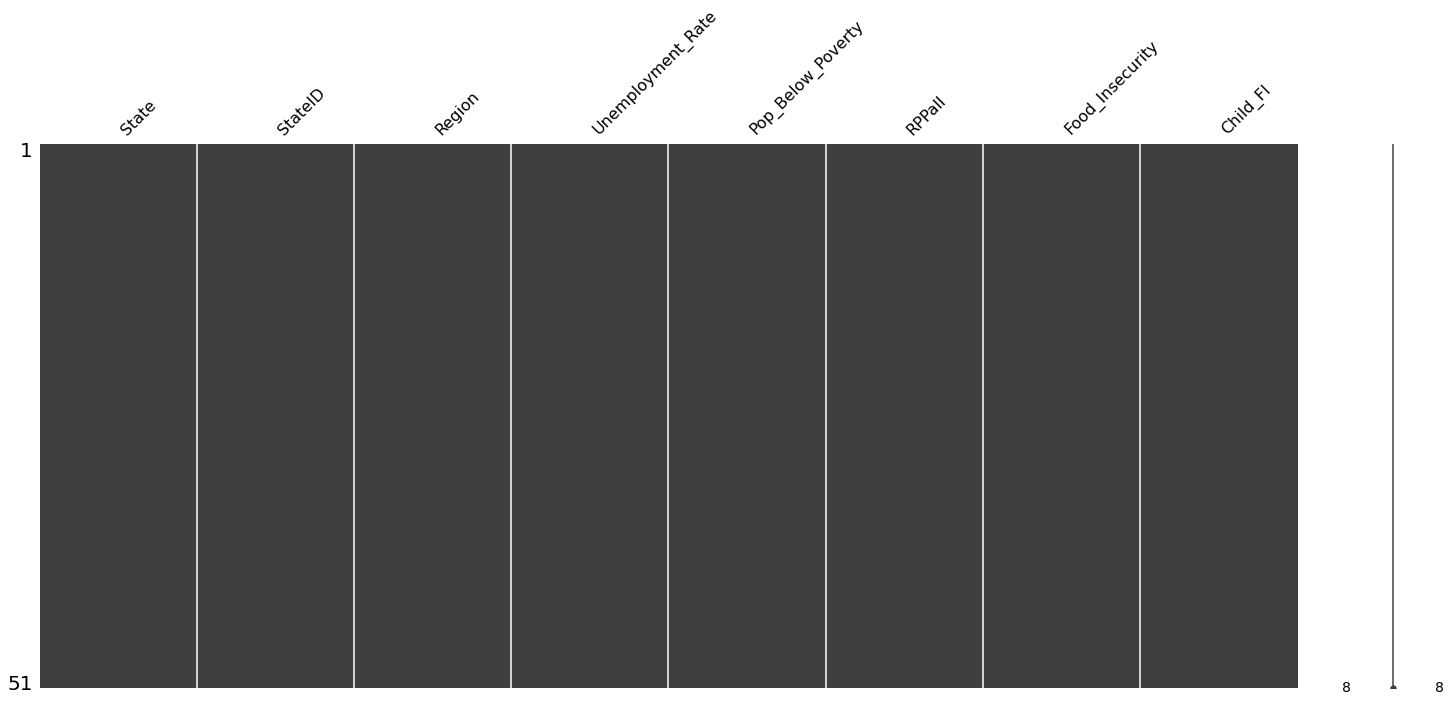

In [14]:
#//////////////////////////////////////////#
# Missing Values #
#/////////////////////////////////////////#

msno.matrix(Feeding_People) 
##This shows how many variables are missing or how many rows are missing.
#The White signifies missing and the gray singnifies that the value is there.
##This is a very important step in any EDA(Exploratory Data Anaylsis) you want to make sure you understand exactly what's 
##missing that way as a Data Scienctist or Data Analysist you can determing what you want to do with this in the future!

In [15]:
#New Dataframe with only columns with numbers
Feeding_People1 = Feeding_People[['State', 'RPPall', 'Pop_Below_Poverty', 'Food_Insecurity', 'Child_FI','Unemployment_Rate']]
Feeding_People1.head()

,State,RPPall,Pop_Below_Poverty,Food_Insecurity,Child_FI,Unemployment_Rate
0,Alabama,91.122,16.2,13.4,18.6,5.858333
1,Alaska,105.048,12.6,16.5,22.5,6.908333
2,Arizona,98.968,16.1,17.2,23.2,5.375000
3,Arkansas,89.845,16.0,14.9,22.7,3.950000
4,California,108.544,13.9,11.7,19.0,5.483333


# Correlation 

In [21]:
Feeding_People1.corr() 

,RPPall,Pop_Below_Poverty,Food_Insecurity,Child_FI,Unemployment_Rate
RPPall,1.000000,-0.410251,-0.224091,-0.086673,0.074514
Pop_Below_Poverty,-0.410251,1.000000,0.381570,0.358440,0.605770
Food_Insecurity,-0.224091,0.381570,1.000000,0.883697,0.369243
Child_FI,-0.086673,0.358440,0.883697,1.000000,0.351646
Unemployment_Rate,0.074514,0.605770,0.369243,0.351646,1.000000


 # Seaborn Correlation Heatmap

<AxesSubplot:>

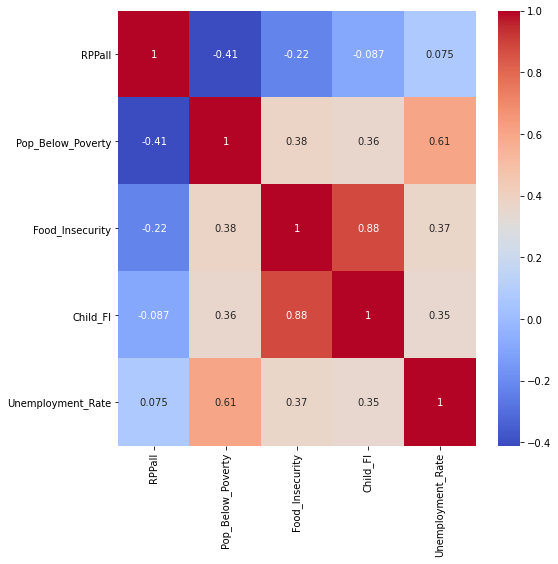

In [19]:
plt.figure(figsize=(8,8))
seaborn.heatmap(Feeding_People1.corr(), annot=True, cmap='coolwarm')

# Matplotlib Correlation Heatmap

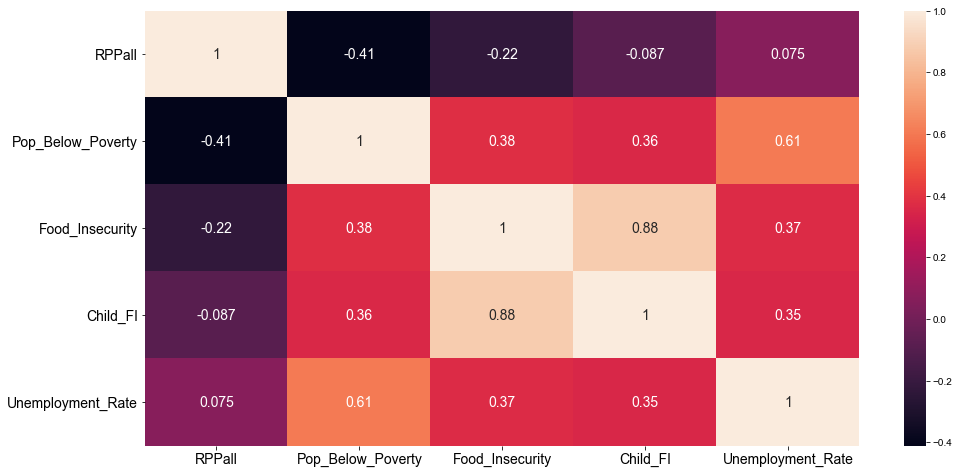

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(Feeding_People1.corr(), annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()